In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# 导入工具包
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

In [2]:
# 引入数据
train = pd.read_csv(f'./train.csv')
test = pd.read_csv(f'./test.csv')
train.shape, test.shape

((1176, 36), (294, 35))

In [3]:
# 数据查看
train.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0


In [4]:
# 数据查看
test.head()

,user_id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,442,36,Non-Travel,635,Sales,10,4,Medical,1,592,...,4,80,0,10,3,2,10,3,9,7
1,1091,33,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,1545,...,4,80,0,5,2,3,5,3,0,2
2,981,35,Travel_Frequently,662,Sales,18,4,Marketing,1,1380,...,3,80,1,5,0,2,4,2,3,2
3,785,40,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,1092,...,4,80,1,14,6,3,11,10,11,1
4,1332,29,Travel_Frequently,459,Research & Development,24,2,Life Sciences,1,1868,...,2,80,0,1,3,2,1,0,1,0


In [5]:
# 信息查看
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   1176 non-null   int64 
 1   Age                       1176 non-null   int64 
 2   Attrition                 1176 non-null   object
 3   BusinessTravel            1176 non-null   object
 4   DailyRate                 1176 non-null   int64 
 5   Department                1176 non-null   object
 6   DistanceFromHome          1176 non-null   int64 
 7   Education                 1176 non-null   int64 
 8   EducationField            1176 non-null   object
 9   EmployeeCount             1176 non-null   int64 
 10  EmployeeNumber            1176 non-null   int64 
 11  EnvironmentSatisfaction   1176 non-null   int64 
 12  Gender                    1176 non-null   object
 13  HourlyRate                1176 non-null   int64 
 14  JobInvolvement          

In [6]:
# 列名查看
train.columns

Index(['user_id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
train.StandardHours.unique()

array([80])

# 1. 信息查看

In [8]:
# 区别不同的列

id_col = 'user_id'

# 预测列
target_col = 'Attrition'

# 数字列
digital_cols = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
# 类别列
category_cols = ['BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
                'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
                'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
                'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
                'WorkLifeBalance']

In [9]:
# 分类相关列数据查看 得出StandardHours、Over18 两列数据全部相同训练时可删除
for col in category_cols:
    # 获取测试集和训练集合
    nunique_tr = train[col].nunique()
    nunique_te = test[col].nunique()
    na_tr = len(train.loc[train[col].isna()]) / len(train)
    na_te = len(test.loc[test[col].isna()]) / len(test)
    print(f'Col name:{col:30}\t unique cate num in train:{nunique_tr:5}\tunique cate num in test:{nunique_te:5}\tnull sample in train:{na_tr:.2f}\tnull sample in test:{na_te:.2f}')

Col name:BusinessTravel                	 unique cate num in train:    3	unique cate num in test:    3	null sample in train:0.00	null sample in test:0.00
Col name:Department                    	 unique cate num in train:    3	unique cate num in test:    3	null sample in train:0.00	null sample in test:0.00
Col name:DistanceFromHome              	 unique cate num in train:   29	unique cate num in test:   29	null sample in train:0.00	null sample in test:0.00
Col name:Education                     	 unique cate num in train:    5	unique cate num in test:    5	null sample in train:0.00	null sample in test:0.00
Col name:EducationField                	 unique cate num in train:    6	unique cate num in test:    6	null sample in train:0.00	null sample in test:0.00
Col name:EmployeeNumber                	 unique cate num in train: 1176	unique cate num in test:  294	null sample in train:0.00	null sample in test:0.00
Col name:EnvironmentSatisfaction       	 unique cate num in train:    4	unique cat

In [10]:
# 数字相关列查看
for col in digital_cols:
    min_tr = train[col].min()
    max_tr = train[col].max()
    mean_tr = train[col].mean()
    median_tr = train[col].median()
    std_tr = train[col].std()
    
    min_te = test[col].min()
    max_te = test[col].max()
    mean_te = test[col].mean()
    median_te = test[col].median()
    std_te = test[col].std()
    
    na_tr = len(train.loc[train[col].isna()]) / len(train)
    na_te = len(test.loc[test[col].isna()]) / len(test)
    print(f'Col name:{col:30}')
    print(f'\tIn train data: min value:{min_tr:.2f}\tmax value:{max_tr:.2f}\tmean value:{mean_tr:.2f}\tmedian value:{median_tr:.2f}\tstd value:{std_tr:.2f}\tnan sample rate:{na_tr:.2f}\t')
    print(f'\tIn  test data: min value:{min_te:.2f}\tmax value:{max_te:.2f}\tmean value:{mean_te:.2f}\tmedian value:{median_te:.2f}\tstd value:{std_te:.2f}\tnan sample rate:{na_te:.2f}\t')

Col name:Age                           
	In train data: min value:18.00	max value:60.00	mean value:36.81	median value:36.00	std value:9.07	nan sample rate:0.00	
	In  test data: min value:18.00	max value:60.00	mean value:37.40	median value:36.00	std value:9.41	nan sample rate:0.00	
Col name:DailyRate                     
	In train data: min value:104.00	max value:1499.00	mean value:802.03	median value:805.50	std value:405.95	nan sample rate:0.00	
	In  test data: min value:102.00	max value:1496.00	mean value:804.30	median value:773.50	std value:394.28	nan sample rate:0.00	
Col name:MonthlyIncome                 
	In train data: min value:1009.00	max value:19999.00	mean value:6458.69	median value:4850.50	std value:4724.85	nan sample rate:0.00	
	In  test data: min value:1514.00	max value:19740.00	mean value:6679.89	median value:5183.00	std value:4643.53	nan sample rate:0.00	
Col name:NumCompaniesWorked            
	In train data: min value:0.00	max value:9.00	mean value:2.70	median value:2

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

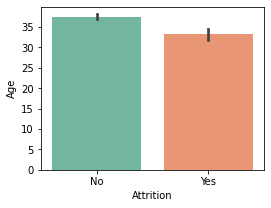

In [11]:
# 查看 age and attrition 关系
plt.figure(figsize=(4,3))
sns.barplot(x='Attrition', y='Age', data = train , palette = 'Set2')

# 2. 数据处理

In [12]:
# 目标值转化为0，1
train[target_col].unique()
target_col_dict = {'Yes': 1, 'No': 0}
train_labels = train[target_col].map(target_col_dict).values

In [13]:
# 数字列归一化 到[0,1]
sacalar = MinMaxScaler()
train_digital = sacalar.fit_transform(train[digital_cols])
test_digital = sacalar.transform(test[digital_cols])

In [14]:
# 分类列数据处理
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train_category, test_category = None, None
# 删除无意义列 EmployeeNumber 员工号码：所有人不同，Over18、StandardHours：所有人相同
drop_cols = ['EmployeeNumber', 'Over18', 'StandardHours']
for col in [var for var in category_cols if var not in drop_cols]: 
    lbe, ohe = LabelEncoder(), OneHotEncoder()
    # LabelEncoder将Label标准化
    lbe.fit(pd.concat([train[col], test[col]]).values.reshape(-1, 1))
    train[col] = lbe.transform(train[col])
    test[col] = lbe.transform(test[col])
    
    ohe.fit(pd.concat([train[col], test[col]]).values.reshape(-1, 1))
    oht_train = ohe.transform(train[col].values.reshape(-1, 1)).todense()
    oht_test = ohe.transform(test[col].values.reshape(-1, 1)).todense()

    # 把训练数据和测试数据连起来
    if train_category is None:
        train_category = oht_train
        test_category = oht_test
    else:
        train_category = np.hstack((train_category, oht_train))
        test_category = np.hstack((test_category, oht_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [15]:
train_features = np.hstack((train_digital, train_category))
test_features = np.hstack((test_digital, test_category))
train_features.shape, test_features.shape

((1176, 110), (294, 110))

# 3. 模型训练预测 

In [16]:
#  切分数据为训练集和验证集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.20, random_state=42)

In [ ]:
#  LinearRegression 训练
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

#验证集上的auc值
test_auc = metrics.roc_auc_score(y_test,ypred)
print(test_auc)

In [ ]:
sub = test[['user_id']].copy()
sub['Attrition'] = predictions
sub['Attrition'] = sub['Attrition'].apply(lambda x: x if x >=0 else 0.0005)
print(sub.head())
sub.to_csv('submission.csv', index=False)

# 4.使用TPOTClassifier

In [17]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline.py')


Generation 1 - Current best internal CV score: 0.8723404255319149

Generation 2 - Current best internal CV score: 0.8787234042553191

Generation 3 - Current best internal CV score: 0.8819148936170211

Generation 4 - Current best internal CV score: 0.8819148936170211

Generation 5 - Current best internal CV score: 0.8819148936170211

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=7, max_features=0.25, min_samples_leaf=14, min_samples_split=4, n_estimators=100, subsample=0.3)
0.8347457627118644


In [23]:
print(tpot.score(X_test, y_test))

0.8135593220338984


In [ ]:
conda update scikit-learn -v 0.11.7

In [30]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the outcome column is labeled 'target' in the data file

tpot_data = pd.read_csv(f'./train.csv')
features = tpot_data.drop('Attrition', axis=1)
training_features, testing_features, training_target, testing_target = train_test_split(features, tpot_data['Attrition'], random_state=None)

# # Average CV score on the training set was: 0.875531914893617
exported_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.3, min_samples_leaf=10, min_samples_split=18, n_estimators=100)),
    ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.2, min_samples_leaf=6, min_samples_split=4, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
# results = exported_pipeline.predict(testing_features)


ValueError: could not convert string to float: 'Travel_Rarely'